In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import proj1_helpers as helpers
import scipy as sp
import matplotlib.pyplot as plot
import numpy as np
import implementations as implementations
from run import *

In [48]:

y, tX, ids = helpers.load_csv_data("../data/train.csv")
column_labels = "Id	Prediction	DER_mass_MMC	DER_mass_transverse_met_lep	DER_mass_vis	DER_pt_h	DER_deltaeta_jet_jet	DER_mass_jet_jet	DER_prodeta_jet_jet	DER_deltar_tau_lep	DER_pt_tot	DER_sum_pt	DER_pt_ratio_lep_tau	DER_met_phi_centrality	DER_lep_eta_centrality	PRI_tau_pt	PRI_tau_eta	PRI_tau_phi	PRI_lep_pt	PRI_lep_eta	PRI_lep_phi	PRI_met	PRI_met_phi	PRI_met_sumet	PRI_jet_num	PRI_jet_leading_pt	PRI_jet_leading_eta	PRI_jet_leading_phi	PRI_jet_subleading_pt	PRI_jet_subleading_eta	PRI_jet_subleading_phi	PRI_jet_all_pt".split("\t")[2:]

In [3]:
tX[tX[:, :] == -999] = np.nan  
#tX = implementations.standardize(tX)

In [115]:
def plot_features(features, labels):
    features_higgs = features[labels[:] == 1, :]
    features_background = features[labels[:] == -1, :]
    
    for i in range(len(column_labels)):
        n_bins = 50
        feature = (features_higgs[features_higgs[:, i] != -999, i], features_background[features_background[:, i] != -999, i])
        color=['red', 'blue']
        label=['Higgs', 'Background']
        
        plot.hist(feature, n_bins, normed = True, histtype='bar', color=color, label=label)
        plot.legend(prop={'size': 10})
        plot.title(column_labels[i] + " normalized")
        plot.savefig("../data/images/" + str(i) + "-" + column_labels[i] + "_normalized.png", bbox_inches='tight', dpi = 300)
        plot.show()

        plot.hist(feature, n_bins, histtype='bar', color=color, label=label)
        plot.legend(prop={'size': 10})
        plot.title(column_labels[i] + " non-normed")
        plot.savefig("../data/images/" + str(i) + "-" + column_labels[i] + "_non-normalized.png", bbox_inches='tight', dpi = 300)
        plot.show()

        plot.hist(feature, n_bins * 2, histtype='barstacked', color=color, label=label)
        plot.legend(prop={'size': 10})
        plot.title(column_labels[i] + " stacked")
        plot.savefig("../data/images/" + str(i) + "-" + column_labels[i] + "_stacked.png", bbox_inches='tight', dpi = 300)
        plot.show()

In [21]:
[a,b,c,d] = bucket_events(tX)
ya = y[a]
tXa = prepare_data(tX[a])
idsa = ids[a]
yb = y[b]
tXb = prepare_data(tX[b])
idsb = ids[b]
yc = y[c]
tXc = prepare_data(tX[c])
idsc = ids[c]
yd = y[d]
tXd = prepare_data(tX[d])
idsd = ids[d]

In [22]:
losses, ws = implementations.gradient_descent(ya, tXa, np.zeros(tXa.shape[1]), 5000, .01)

In [23]:
min_loss = min(losses)

print([w for l, w in zip(losses, ws) if l == min_loss])

[array([-0.06261417,  0.09346269, -0.51469734, -0.12184504, -0.01805118,
        0.12141591, -0.01805138,  0.28505277,  0.02562995,  0.07354738,
        0.26678662,  0.04414842,  0.01563421,  0.05580277,  0.05216935,
        0.0429947 ,  0.08389527,  0.03409597,  0.01753903,  0.03753528,
        0.03753528])]


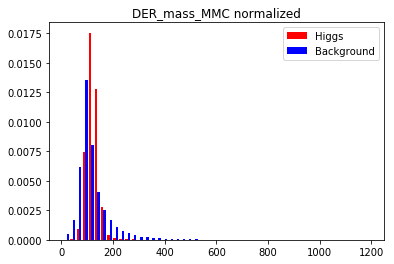

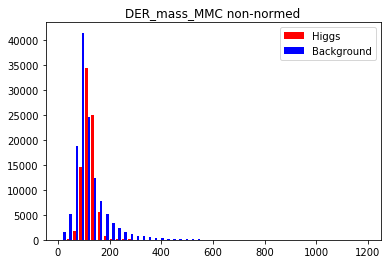

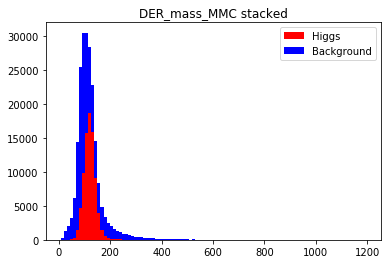

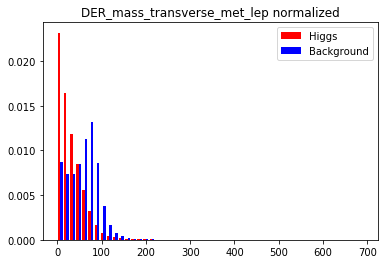

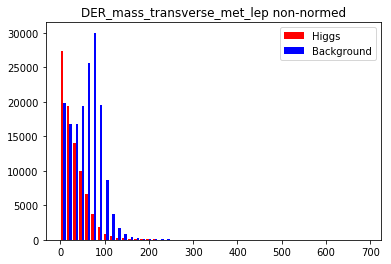

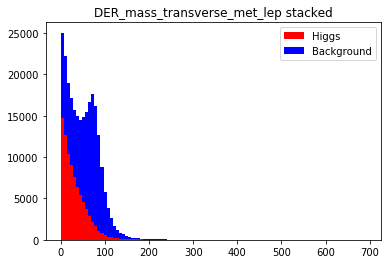

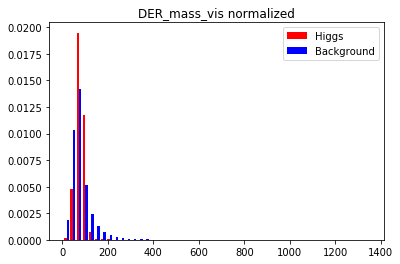

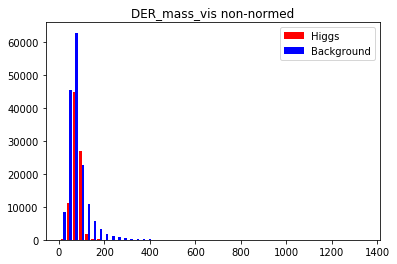

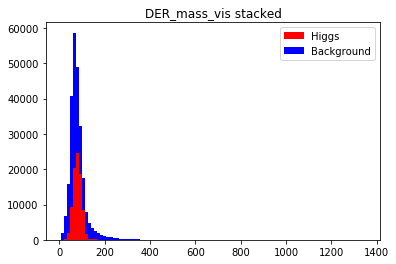

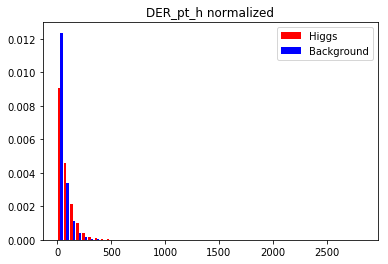

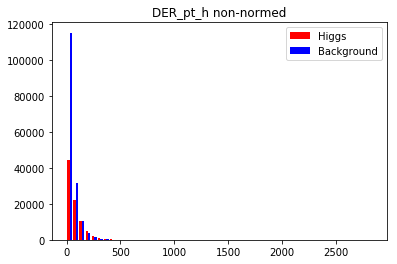

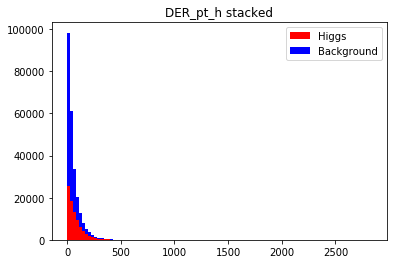

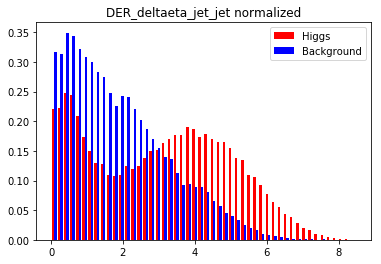

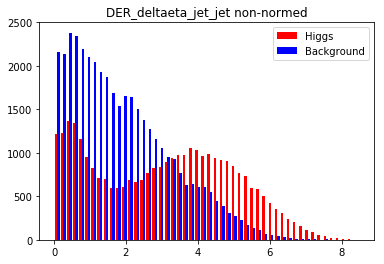

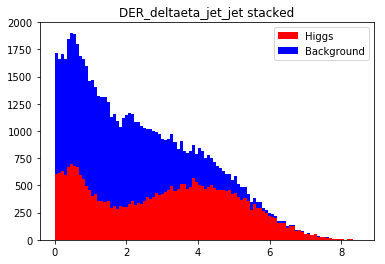

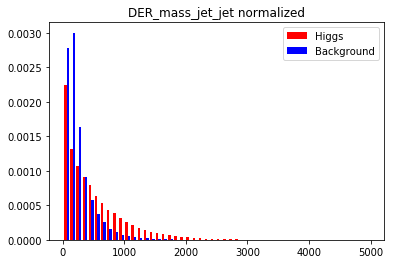

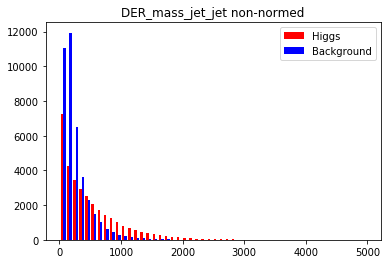

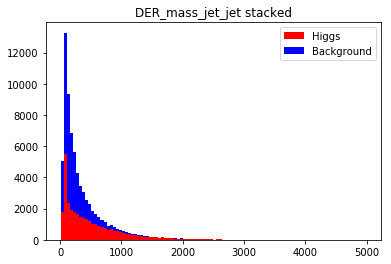

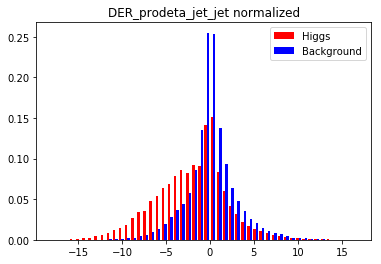

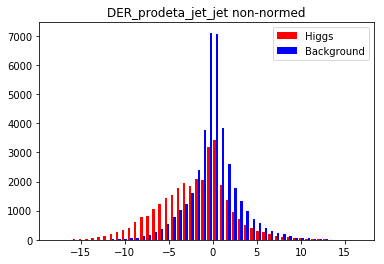

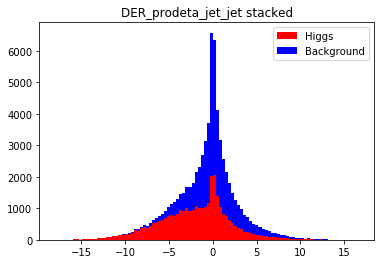

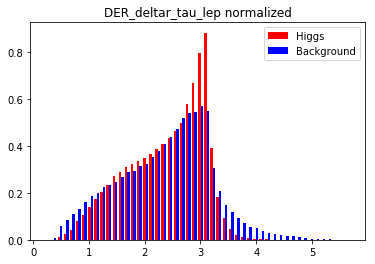

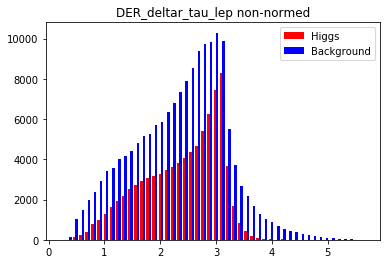

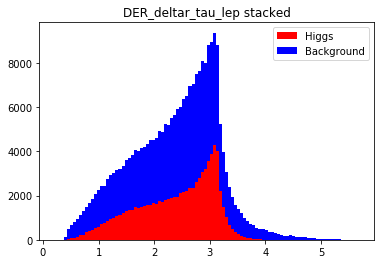

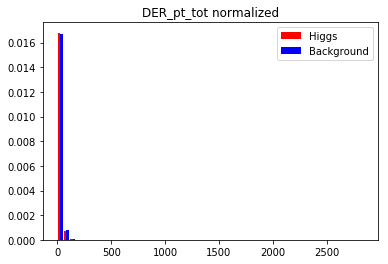

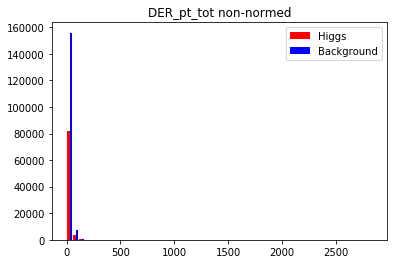

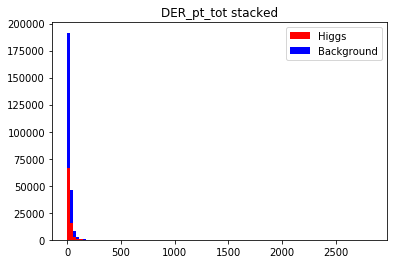

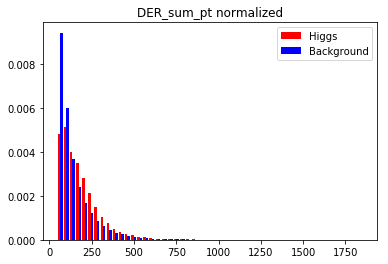

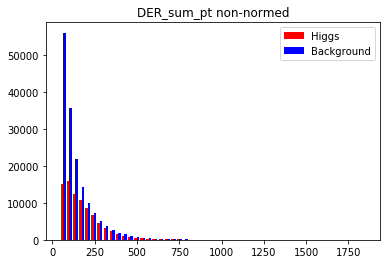

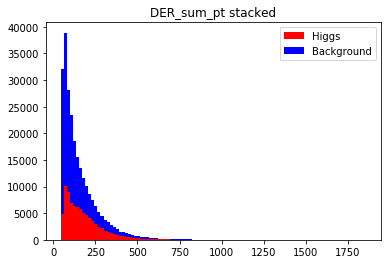

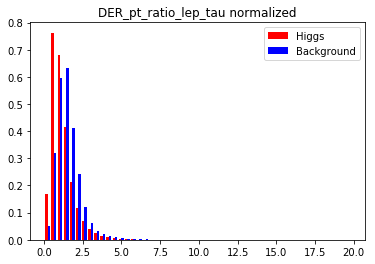

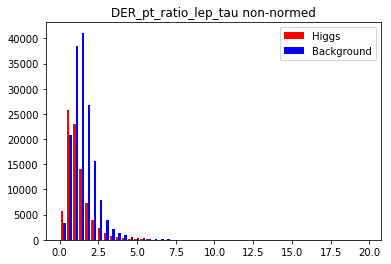

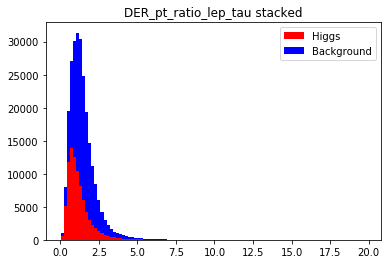

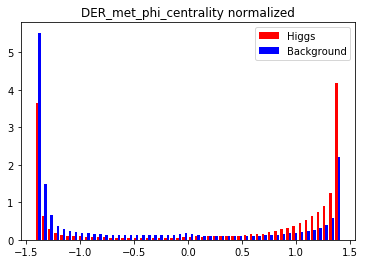

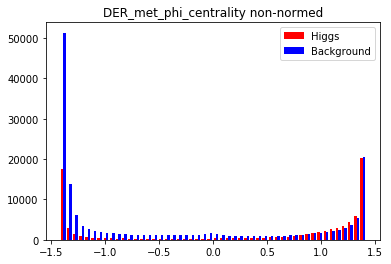

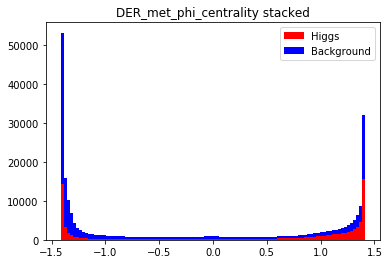

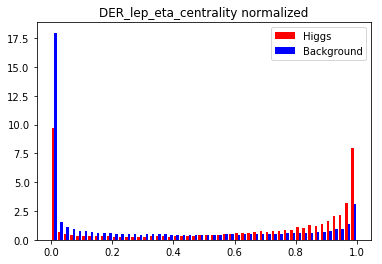

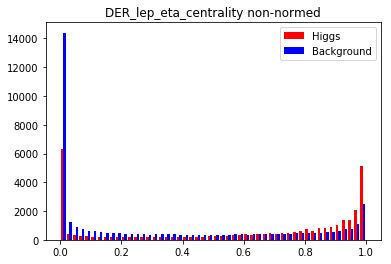

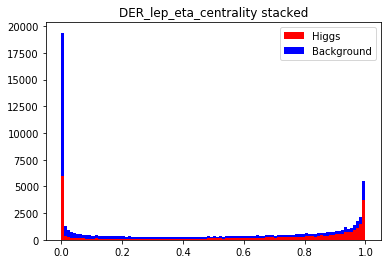

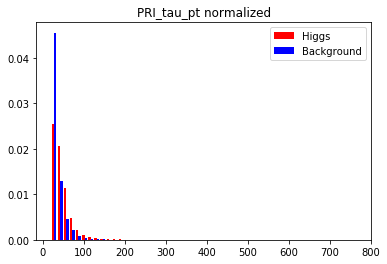

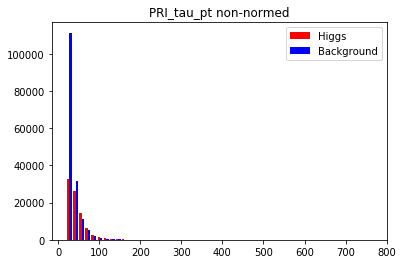

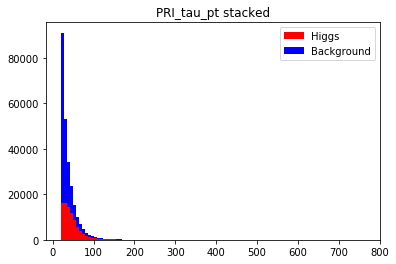

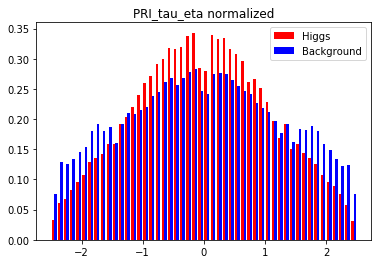

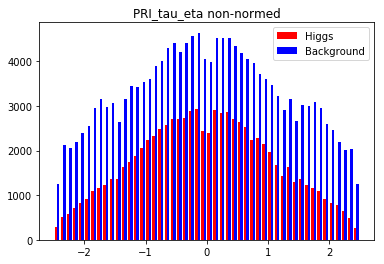

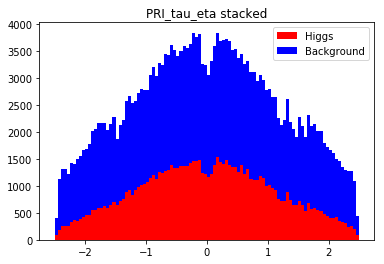

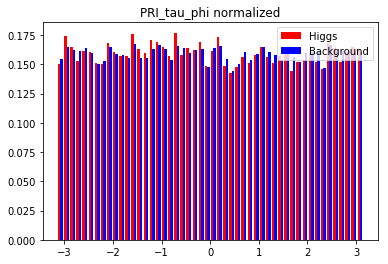

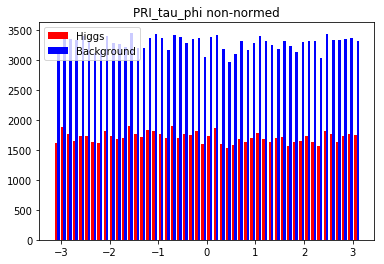

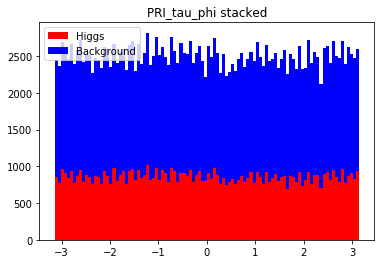

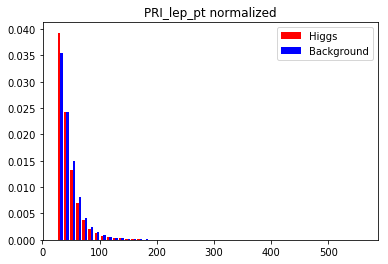

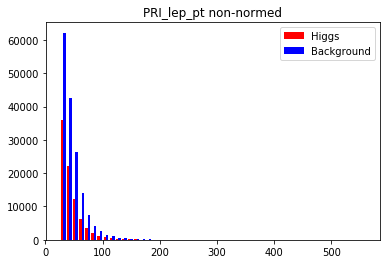

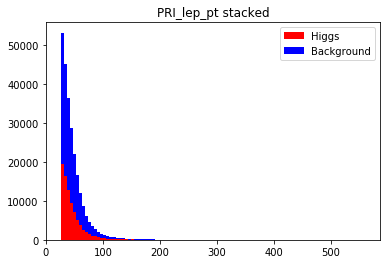

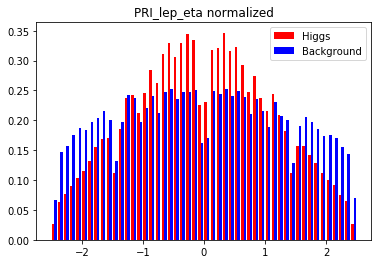

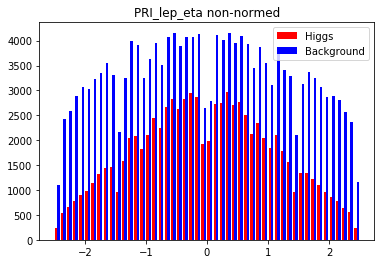

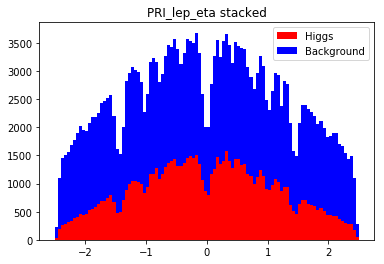

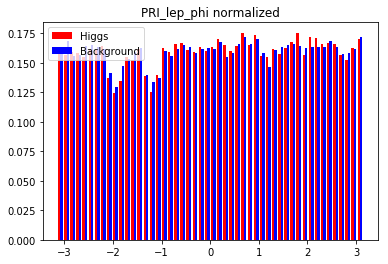

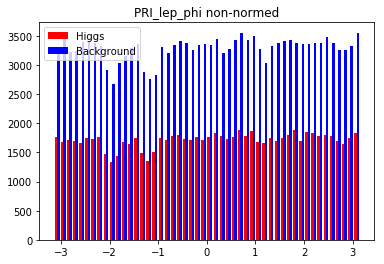

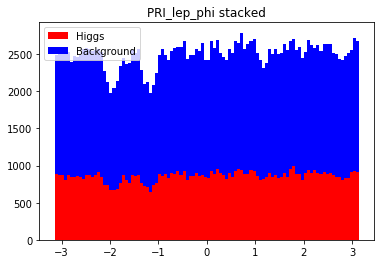

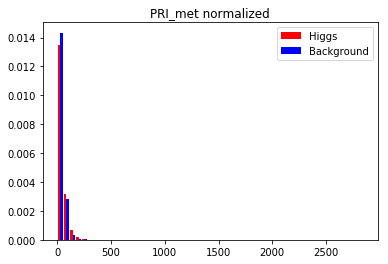

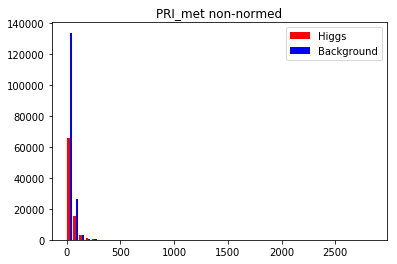

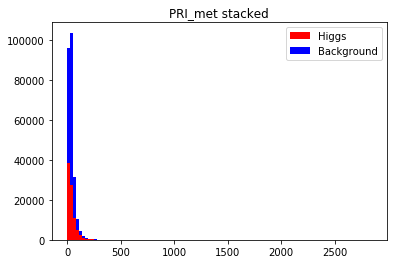

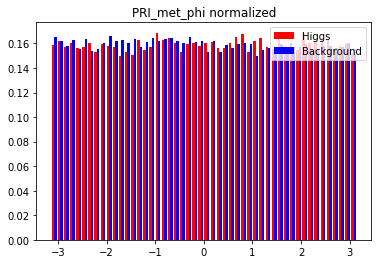

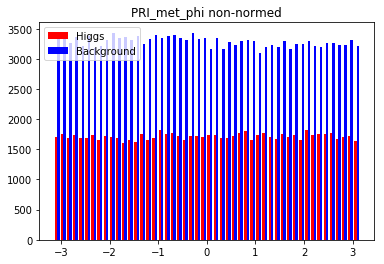

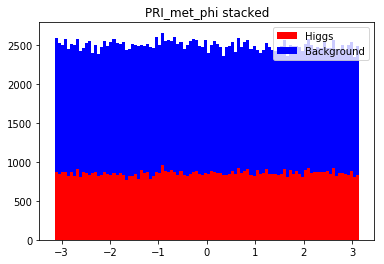

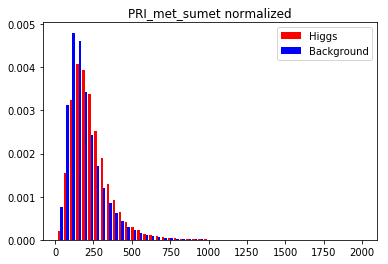

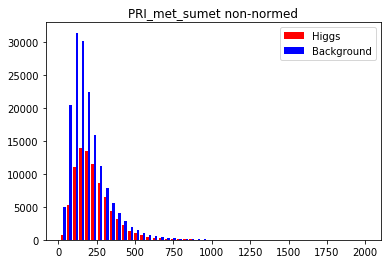

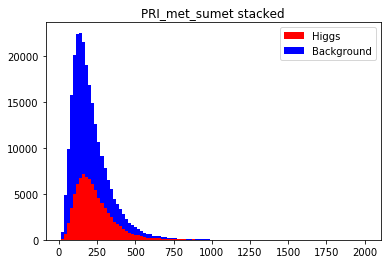

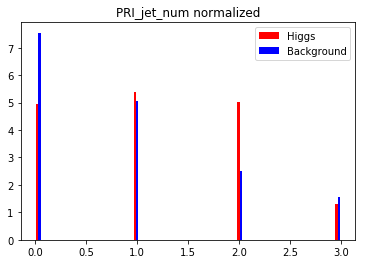

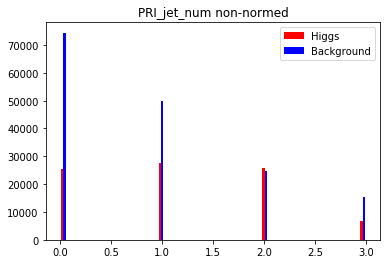

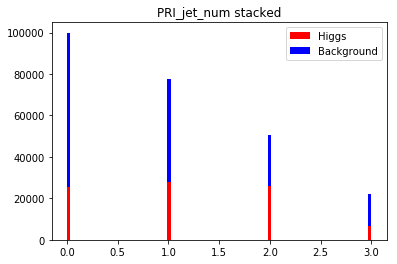

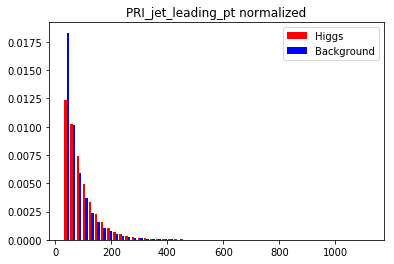

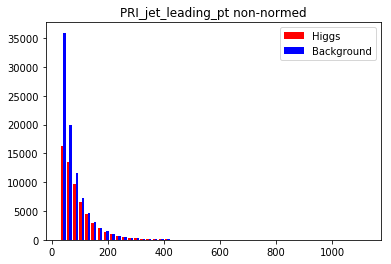

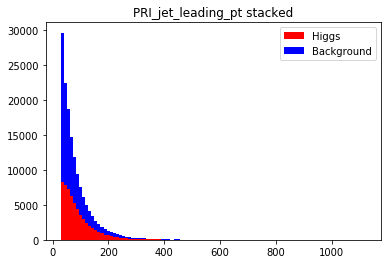

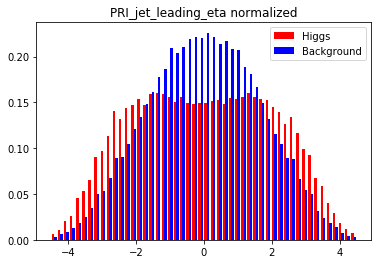

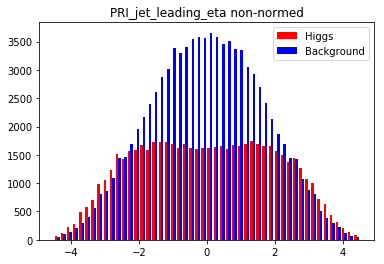

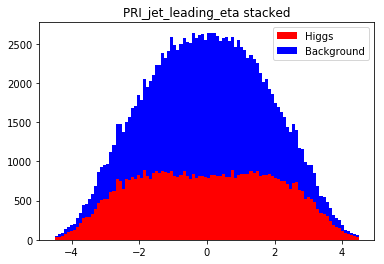

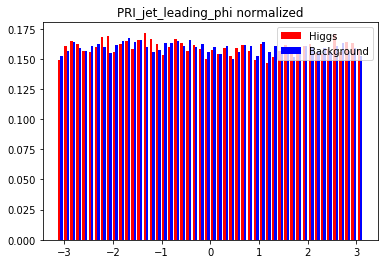

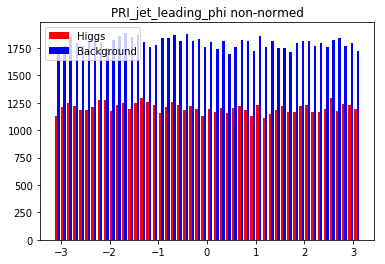

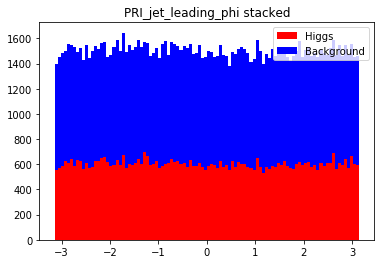

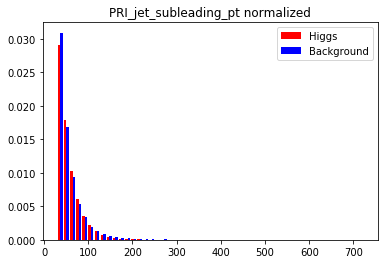

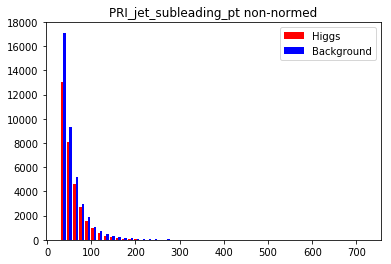

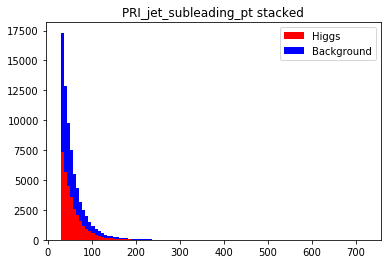

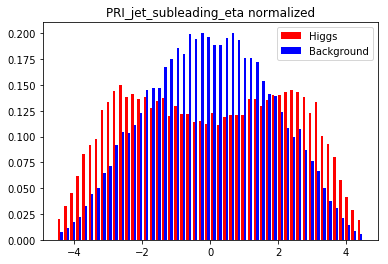

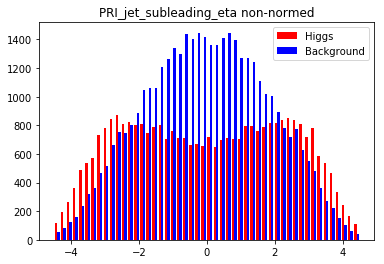

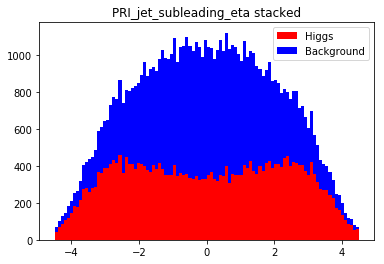

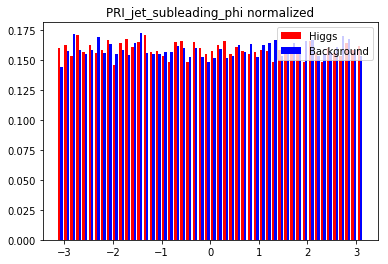

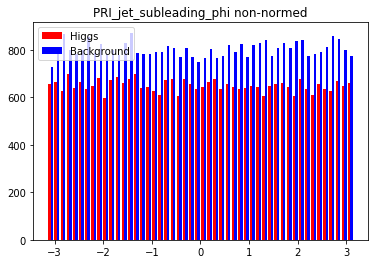

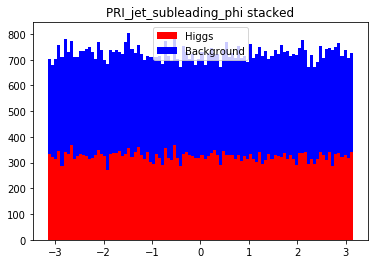

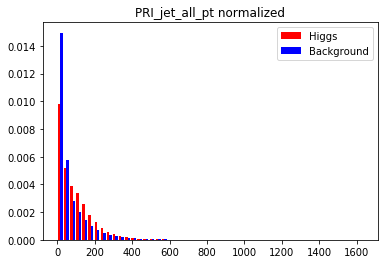

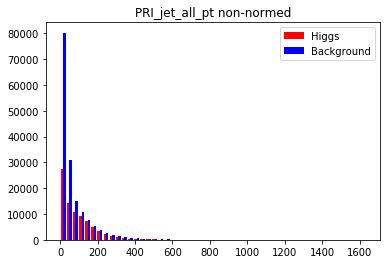

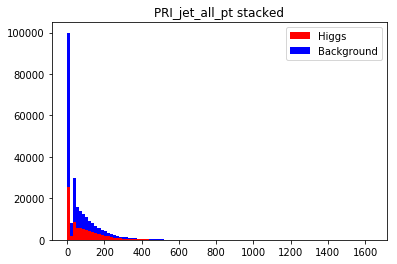

In [116]:
plot_features(tX, y)